# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here. 
import pandas as pd
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

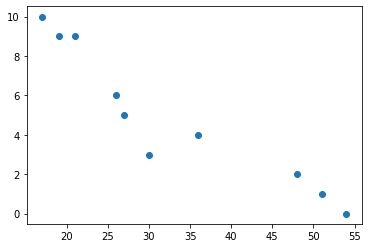

In [2]:
# Your code here.
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(student_data.Age, student_data.Tardies, marker='o');

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [7]:
# Your response here. 
#younger students are more often late.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
# Your response here.
"""
corrélation = covariance normalisée
corrélation = covariance(X, Y) / (std(X) * std(Y))
Variance is a measure of variability from the mean
Covariance is a measure of relationship between the variability of 2 variables - covariance is scale dependent because it is not standardized
Correlation is a relationship between the variability of 2 variables - correlation is standardized making it not scale dependent
"""
print('Covariance : ', student_data.cov())
print('Correlation : ', student_data.corr())

Covariance :                  Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444
Correlation :                Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


In [8]:
#correlation
-45.56 / (student_data["Tardies"].std() * student_data["Age"].std())

-0.9390252837598624

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [17]:
from scipy import stats
X = student_data.Age
Y = student_data.Tardies
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ("The slope is: " + str(slope))
print ("The intercept is: " + str(intercept))
#Tardies = -0,24 * Age + 12,9 ==> Linear regression

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768


In [23]:
x = [student_data.Age.min(), student_data.Age.max()]
y = [slope * i + intercept for i in x]
y

[8.760850257564094, -0.2235182663271953]

Plot your regression model on your scatter plot.

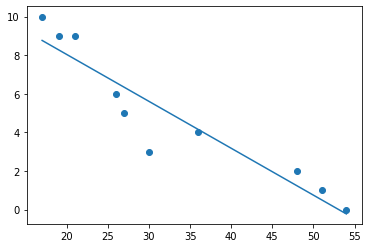

In [25]:
# Your code here.
plt.scatter(student_data.Age, student_data.Tardies)
plt.plot(x, y)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [26]:
# Your response here. 
#R^2 ==> 88% of the Y variables are explained by the X ==> 88% of the variance of the dependent variable being studied is explained by the variance of the independent variable
print(r_value ** 2)
from sklearn.metrics import mean_squared_error
#RMSE (erreur de prédiction en 1,15 jours)
print(np.sqrt(mean_squared_error(student_data.Tardies, slope * student_data.Age + intercept)))
print(p_value)

0.8820265558250108
1.1540884648655088
5.56665383455343e-05


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
# Import any libraries you may need & the data
df = pd.read_csv('vehicles.csv')
df

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [12]:
# Your response here. 
df = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
df.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [17]:
# Your response here. 
import statsmodels.api as sm
model = sm.OLS(df['CO2 Emission Grams/Mile'],df.iloc[0:, 0:4])
results = model.fit()
predictions = results.predict(df.iloc[0:, 0:4])
results.summary()
predictions

0        518.923583
1        668.535919
2        549.021505
3        668.611568
4        554.394787
            ...    
35947    225.972657
35948    226.048307
35949    226.123956
35950    226.199605
35951    235.578664
Length: 35952, dtype: float64

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [64]:
# Your code here. 
data = pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11, 14], 'Y': [1, 2, 4, 4, 5, 7, 8, 13]})
data

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

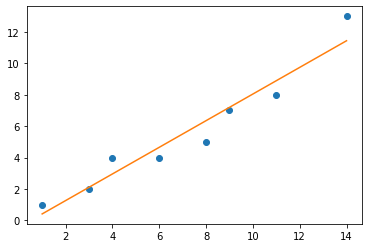

In [71]:
# Your code here.
plt.plot(data.X, data.Y, 'o')
slope, intercept = np.polyfit(data.X, data.Y, 1)
plt.plot(data.X, slope*data.X + intercept)

In [68]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data.X, data.Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 0.8484848484848485
The intercept is: -0.43939393939393945


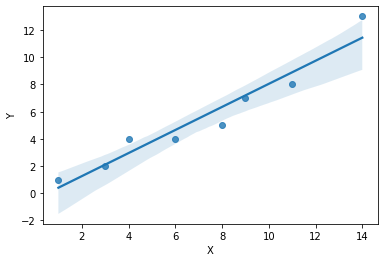

In [69]:
import seaborn as sns
import pandas as pd
sns.regplot(x = data.X, y = data.Y, data=data)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [72]:
# Your response here. 
#Strong positive correlation
data.corr()

,X,Y
X,1.00000,0.96523
Y,0.96523,1.00000


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

,X,Y
X,1.000000,0.971278
Y,0.971278,1.000000


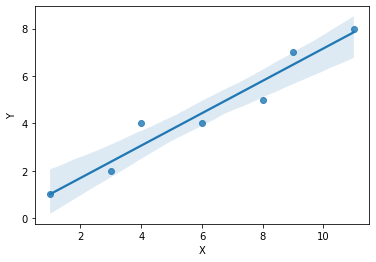

In [74]:
# Your response here. 
# Your code here. 
data = pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11], 'Y': [1, 2, 4, 4, 5, 7, 8]})
sns.regplot(x = data.X, y = data.Y, data=data)
data.corr()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 